In [1]:
import datajoint as dj

In [3]:
import sys, os
path = os.path.join(os.getcwd(), '..')
sys.path.append(path)
from u19_pipeline_python import lab, reference, subject, action, task, acquisition
import datajoint as dj

In [35]:
lab = dj.create_virtual_module('lab_virtual', 'U19_lab')
action = dj.create_virtual_module('action_virtual', 'U19_action')
acquisition = dj.create_virtual_module('acquisition_virtual', 'U19_acquisition')

In [20]:
f = dj.Diagram(lab)

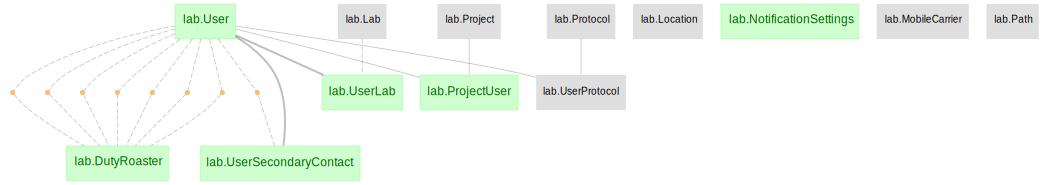

In [21]:
f

In [22]:
f.save('lab_erd.png')

In [15]:
f = dj.Diagram(subject.Subject) + subject.Line + subject.Cage + subject.CagingStatus + subject.Death + \
subject.Weaning + subject.ActItem + subject.SubjectActItem + subject.HealthStatus + subject.HealthStatus.Action

In [16]:
f.save('subject_erd.png')

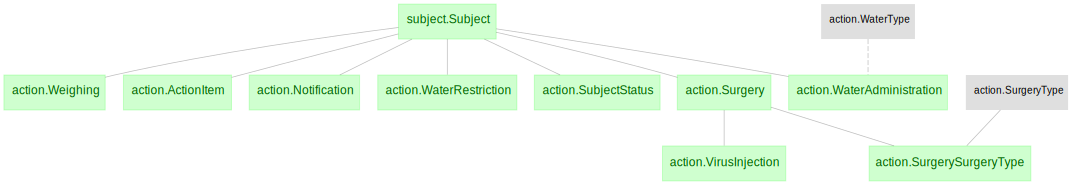

In [28]:
f = dj.Diagram(action) + subject.Subject
f

In [29]:
f.save('action_erd.png')

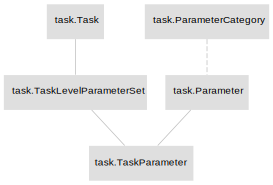

In [30]:
f = dj.Diagram(task)
f

In [31]:
f.save('task_erd.png')

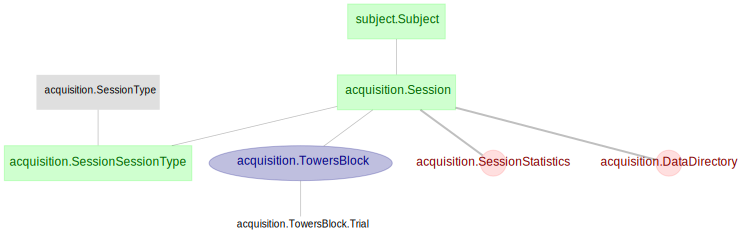

In [39]:
f = dj.Diagram(acquisition) + subject.Subject - (dj.Diagram(acquisition.Scan) + 1)
f

In [40]:
f.save('behavior_erd.png')

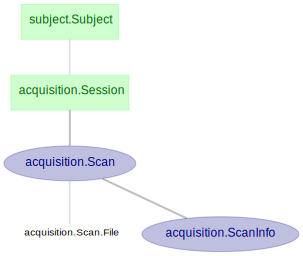

In [41]:
f = dj.Diagram(acquisition.Session) + subject.Subject + \
acquisition.ScanInfo + acquisition.Scan + acquisition.Scan.File
f

In [43]:
f.save('scanning_erd.png')

In [51]:
imaging = dj.create_virtual_module('imaging_virtual', 'U19_imaging')

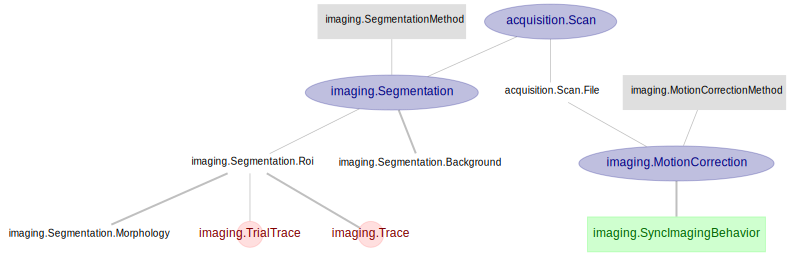

In [55]:
f = dj.Di(imaging) + acquisition.Scan + acquisition.Scan.File
f

In [56]:
f.save('imaging_erd.png')

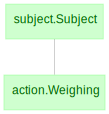

In [74]:
dj.Di(subject.Subject) + action.Weighing

In [60]:
subject = dj.create_virtual_module('subject', 'U19_subject')

In [61]:
subject.Subject.describe();

-> lab.User
subject_id           : char(8)                      # nickname
---
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
-> lab.Location
-> [nullable] lab.Protocol
-> [nullable] subject.Line
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        



In [75]:
action.Weighing.describe()

-> subject.Subject
weighing_time        : datetime                     
---
-> lab.User.proj(weigh_person="user_id")
-> lab.Location
weight               : float                        # in grams
weight_notice=""     : varchar(255)                 



'-> subject.Subject\nweighing_time        : datetime                     \n---\n-> lab.User.proj(weigh_person="user_id")\n-> lab.Location\nweight               : float                        # in grams\nweight_notice=""     : varchar(255)                 \n'

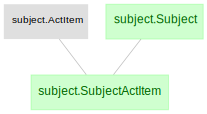

In [81]:
dj.Di(subject.Subject) + subject.ActItem + subject.SubjectActItem

In [83]:
subject.SubjectActItem.describe();

-> subject.Subject
-> subject.ActItem



In [9]:
lab.User.describe();

user_id              : varchar(32)                  # username
---
full_name=null       : varchar(32)                  # first name
email=null           : varchar(64)                  # email address
phone=null           : varchar(12)                  # phone number
carrier=null         : varchar(16)                  # phone carrier
slack=null           : varchar(32)                  # slack username
contact_via          : enum('Slack','text','Email') 
presence             : enum('Available','Away')     
primary_tech="N/A"   : enum('yes','no','N/A')       
tech_responsibility="N/A" : enum('yes','no','N/A')       
day_cutoff_time      : blob                         
slack_webhook=null   : varchar(255)                 
watering_logs=null   : varchar(255)                 



In [10]:
lab.UserLab.describe();

-> lab.User
---
-> lab.Lab

